
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](data/svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](data/svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [1]:
import pandas as pd

data_input = pd.read_csv('data/Ankieta.csv')
data_input.head()

,Waga,Wzrost,Plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


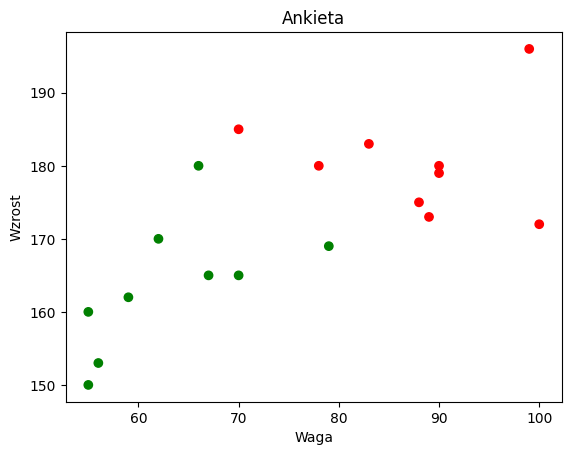

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

/var/folders/4q/d7jl9ztd24v9vj6rdqn4vyp00000gn/T/ipykernel_6665/1618543461.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data_input.hist(ax=ax)


array([[<AxesSubplot: title={'center': 'Waga'}>,
        <AxesSubplot: title={'center': 'Wzrost'}>],
       [<AxesSubplot: title={'center': 'Plec'}>, <AxesSubplot: >]],
      dtype=object)

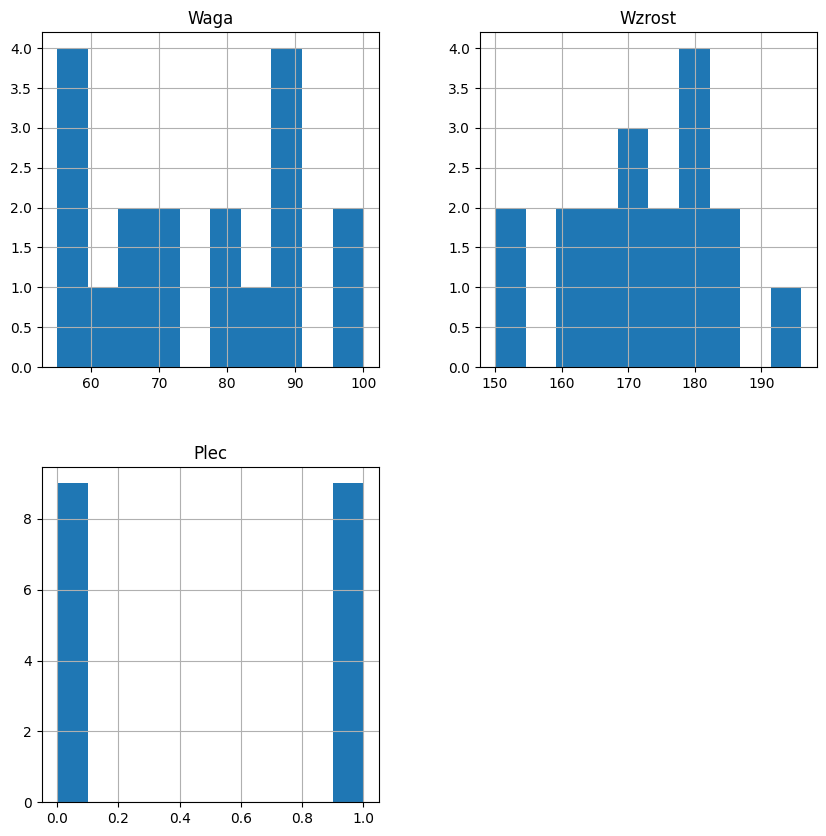

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

<AxesSubplot: >

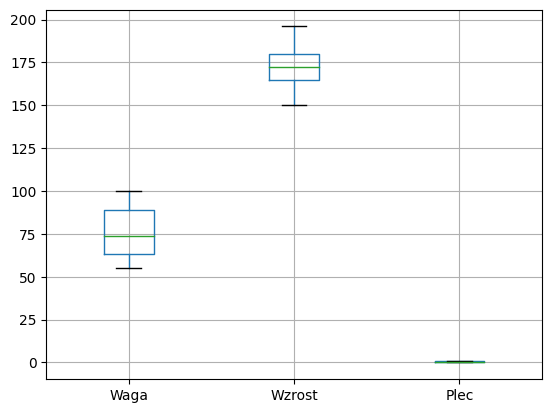

In [4]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane?

<AxesSubplot: >

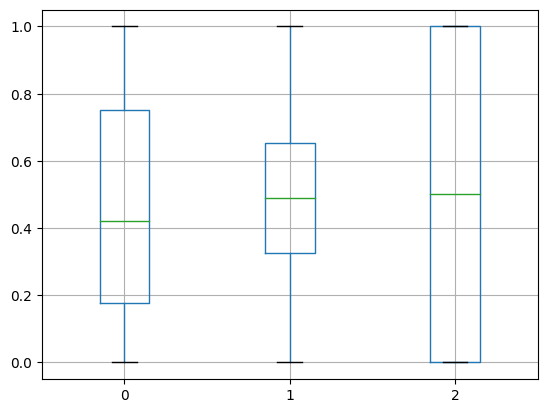

In [5]:
#INSERT YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler
data = data_input.values

# defined min maxJa scaler
scaler = MinMaxScaler()

# transformed data
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).boxplot()

### Odpowiedź
Po normalizacji dane należą do zakresu <0, 1>

## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym.

In [6]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_N = data_scaled[:, :2]
Y_N = data_scaled[:, 2]

X_train, X_test, Y_train, Y_test = train_test_split(X_N, Y_N, test_size=0.2)

## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [7]:
from sklearn.svm import SVC
import numpy as np

def accuracy(clf, x_test, y_test):
    predicted = clf.predict(x_test)
    accuracy = np.sum(predicted == y_test) / len(y_test)
    return accuracy

# Noramlized
clf_n = SVC()
clf_n.fit(X_train, Y_train)
print(f'Normalized data - {accuracy(clf_n, X_test, Y_test)}')

# Unnormalized
X_UN = data[:, :2]
Y_UN = data[:, 2]
X_UN_train, X_UN_test, Y_UN_train, Y_UN_test = train_test_split(X_UN, Y_UN, test_size=0.2)

clf_un = SVC()
clf_un.fit(X_UN_train, Y_UN_train)
print(f'Unnormalized data - {accuracy(clf_un, X_UN_test, Y_UN_test)}')

Normalized data - 1.0
Unnormalized data - 0.75


### Odpowiedź
Przed standaryzacją danych klasyfikator w większości przypadków osiąga mniejszą skuteczność niż po standaryzacji danych.

## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu -1, 1 z krokiem co 0.1). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

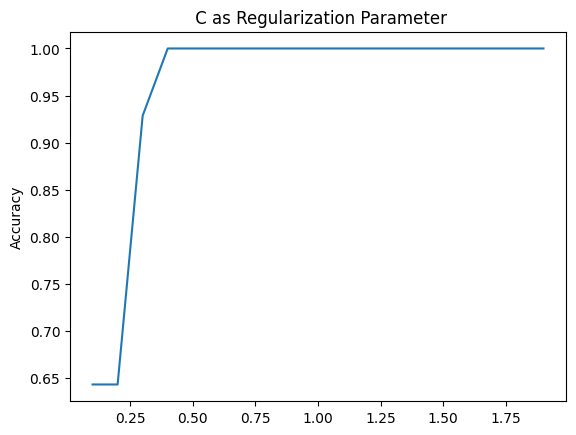

In [8]:
#YOUR CODE HERE
import matplotlib.pyplot as plt

c_range = np.arange(0.1, 2.0, 0.1)
accuracy_list = []

for c in c_range:
    clf = SVC(C=c)
    clf.fit(X_train, Y_train)
    accuracy_list.append(accuracy(clf, X_train, Y_train))
    
plt.figure()
plt.ylabel("Accuracy")
plt.title(' C as Regularization Parameter')
plt.plot(c_range, accuracy_list)

### Odpowiedź
Parametr C nie może być mniejszy ani równy 0 - zadanie zostało wykonane dla c z zakresu <0.1, 2.0>. Potrafi on wpłynąć znaacząco na wynik - można nim poprawić skuteczność o ponad 40% w powyższym zakresie.

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

## Zadanie 5

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

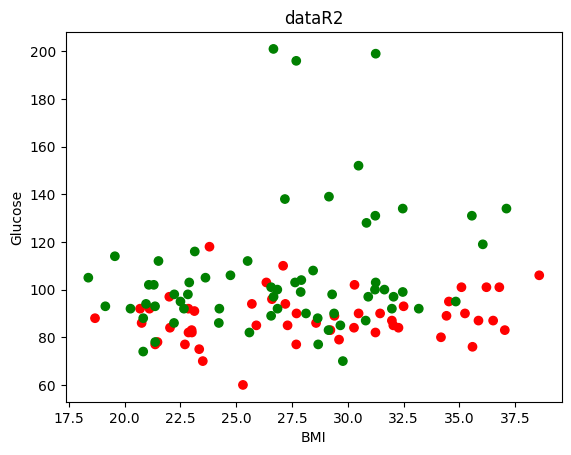

In [9]:
#YOUR CODE HERE
data_input = pd.read_csv('data/dataR2.csv')
X = data_input['BMI']
Y = data_input['Glucose']
Z = data_input['Classification']

plt.scatter(X, Y, c=Z, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.title('dataR2')
plt.show()


## Zadanie 6

Proszę dokonać standaryzacji danych

<AxesSubplot: >

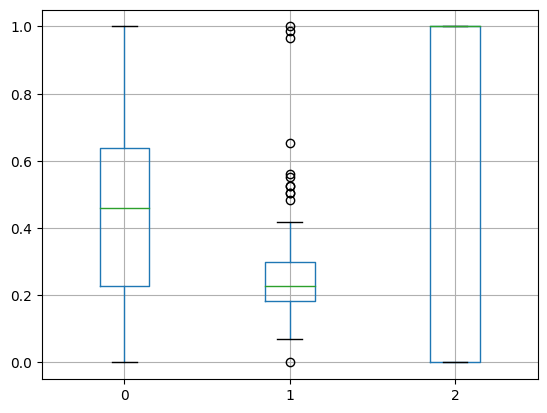

In [10]:
#YOUR CODE HERE
data = data_input[['BMI', 'Glucose', 'Classification']].values

# defined min maxJa scaler
scaler = MinMaxScaler()

# transformed data
data_scaled = scaler.fit_transform(data)
pd.DataFrame(data_scaled).boxplot()

## Zadanie 7

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

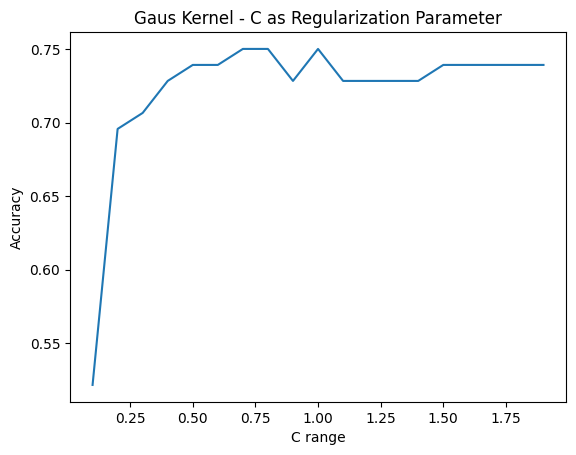

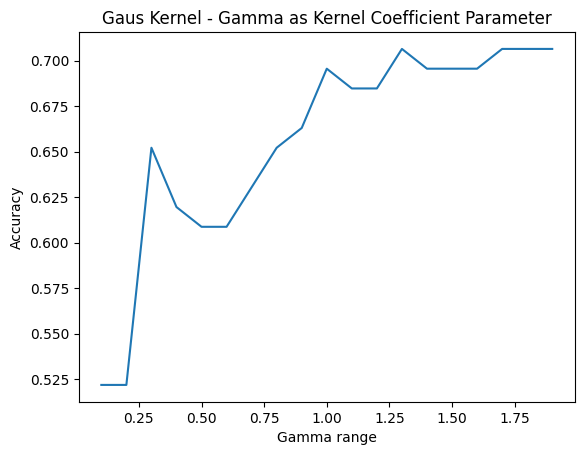

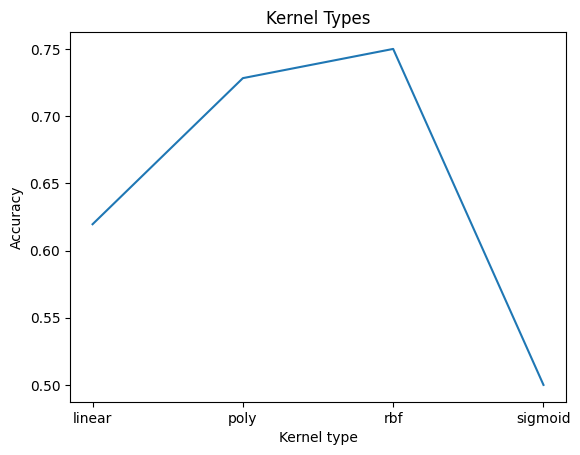

In [11]:
#YOUR CODE HERE
X = data_scaled[:, :2]
Y = data_scaled[:, 2]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)
range_list = np.arange(0.1, 2.0, 0.1)

def print_plot(x_label, y_label, title, range_list, accuracy_list):
    plt.figure()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(range_list, accuracy_list)
    
accuracy_list = []
for c in c_range:
    clf = SVC(C=c)
    clf.fit(X_train, Y_train)
    accuracy_list.append(accuracy(clf, X_train, Y_train))
    
print_plot('C range', 'Accuracy', 'Gaus Kernel - C as Regularization Parameter', 
           range_list, accuracy_list)

accuracy_list = []
for g in c_range:
    clf = SVC(gamma=g)
    clf.fit(X_train, Y_train)
    accuracy_list.append(accuracy(clf, X_train, Y_train))

print_plot('Gamma range', 'Accuracy', 'Gaus Kernel - Gamma as Kernel Coefficient Parameter', 
           range_list, accuracy_list)

accuracy_list = []
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for krl in kernel_list:
    clf = SVC(kernel=krl)
    clf.fit(X_train, Y_train)
    accuracy_list.append(accuracy(clf, X_train, Y_train))

print_plot('Kernel type', 'Accuracy', 'Kernel Types', 
           kernel_list, accuracy_list)


### Odpowiedź
Na powyższych wykresach możemy zauważyć prawidłowość, w której wraz ze wzrostem współczynników Gamma oraz C, skuteczność wzrasta.

Możemy również wywnioskować, że skuteczność kernela rbf oraz poly jest najwyższa. Najniższą skutecznością cechuje się kernel sigmoid.

## Zadanie 8

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

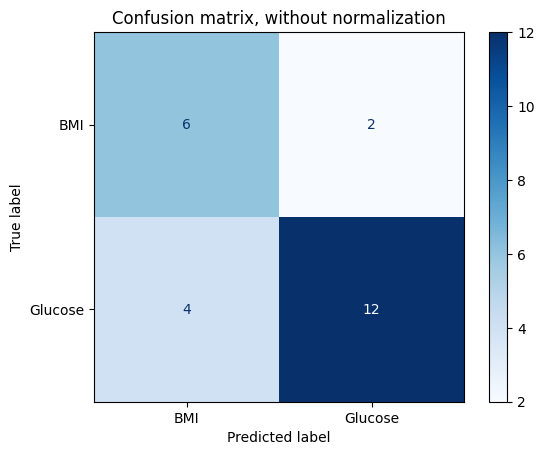

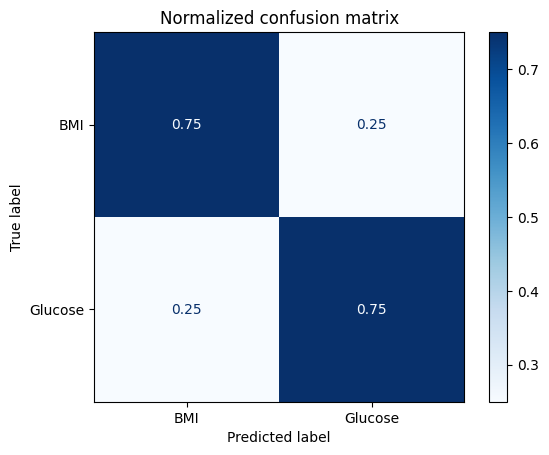

In [12]:
#YOUR CODE HERE
from sklearn.metrics import ConfusionMatrixDisplay

clf = SVC()
clf.fit(X_train, Y_train)


# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        Y_test,
        display_labels=['BMI', 'Glucose'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

### Odpowiedź
W powyższym przykładzie, na macierzy widoczne jest że przykładowy klasyfikator popełnił 3 błędy na 24 próbki.

Przykład z macierzą i danymi znormalizowanymi pozwala na określenie wartości procentowych.